# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
preview_columns = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]

combined_df = combined_data_df[preview_columns]
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
#Checking the number of mice
mice_count = combined_df["Mouse ID"].nunique()
mice_count

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Find duplicate mice by ID number and Timepoint
duplicate_mice = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

#Display the list of duplicate mouse IDs
duplicate_mouse_ids

array(['g989'], dtype=object)

In [24]:
#Choose a duplicate mouse ID from the list
selected_duplicate_mouse = duplicate_mouse_ids[0]

# Optional: Get all the data for the duplicate mouse ID
all_data_for_duplicate_mouse = combined_df[combined_df["Mouse ID"] == selected_duplicate_mouse]
all_data_for_duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
#Choose a duplicate mouse ID to drop
drop_duplicate = duplicate_mouse_ids[0]

#Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df["Mouse ID"] != drop_duplicate]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice in the clean DataFrame
cleaned_mice_count = cleaned_df["Mouse ID"].nunique()
cleaned_mice_count

248

In [ ]:
## Summary Statistics

In [38]:
# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_volume = cleaned_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_volume = cleaned_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
var_volume = cleaned_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
sd_volume = cleaned_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem_volume = cleaned_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_volume, 
    "Median Tumor Volume": median_volume, 
    "Tumor Volume Variance": var_volume, 
    "Tumor Volume Std. Dev.": sd_volume, 
    "Tumor Volume Std. Err.": sem_volume
})

# Display the summary DataFrame
summary_df                           

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [74]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df

NameError: name 'clean_df' is not defined

## Bar and Pie Charts

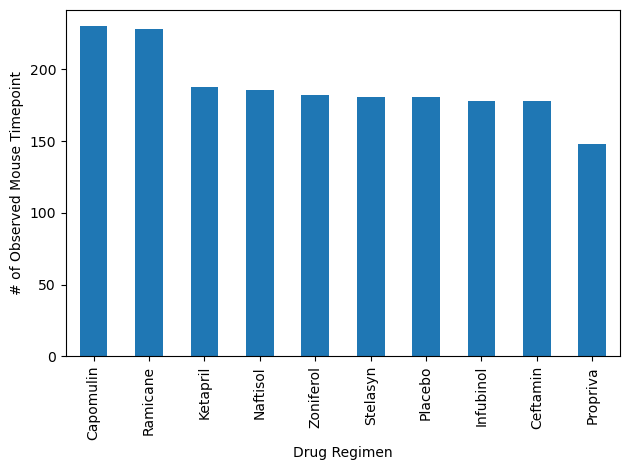

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Create a group series 
regimen_counts = cleaned_df["Drug Regimen"].value_counts()

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts.plot(kind="bar", color="tab:blue")

#Set labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoint")

#Display the bar chart
plt.tight_layout()
plt.show()

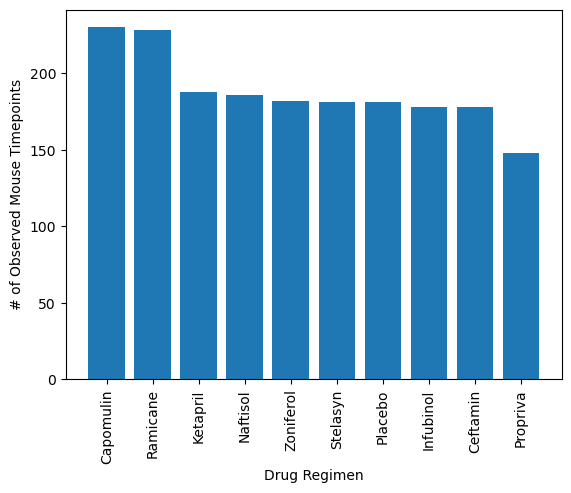

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Define x and y value for the bar chart
x_values = regimen_counts.index.values
y_values = regimen_counts.values

#Create a bar chart
plt.bar(x_values, y_values, color='tab:blue')

#Set labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

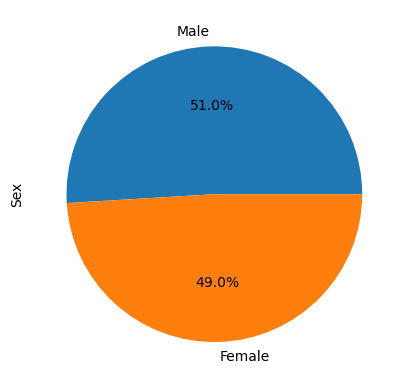

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Count the number of male and female mice
gender_counts = cleaned_df["Sex"].value_counts()

#Plot the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%", colors=["tab:blue", "tab:orange"])
plt.ylabel("Sex")
plt.show()


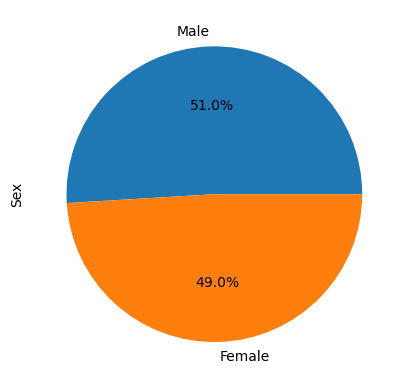

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Labels and sizes for the pie chart
labels = gender_counts.index.values
sizes = gender_counts.values

#The colours for each sex of mice
colours = ["tab:blue", "tab:orange"]

#Create the pie chart
plt.pie(sizes, labels=labels, colors=colours, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


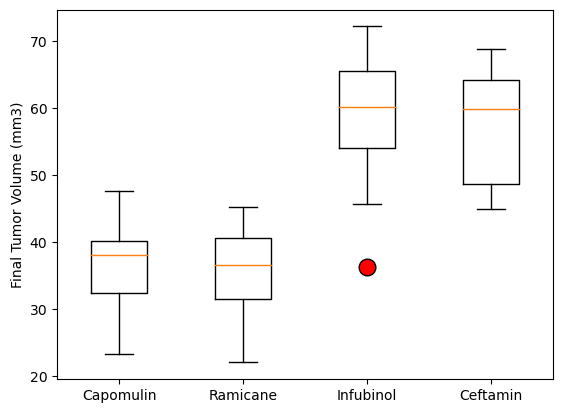

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

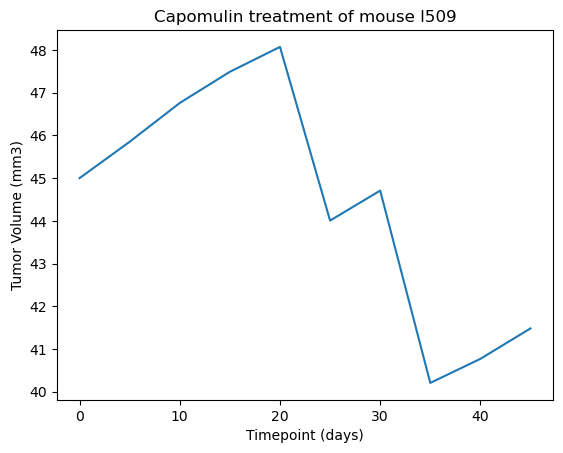

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


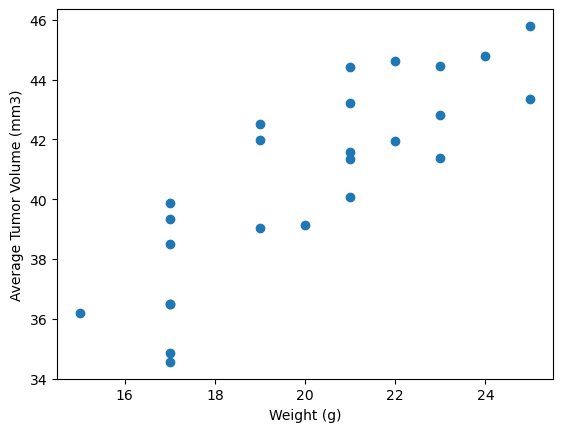

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


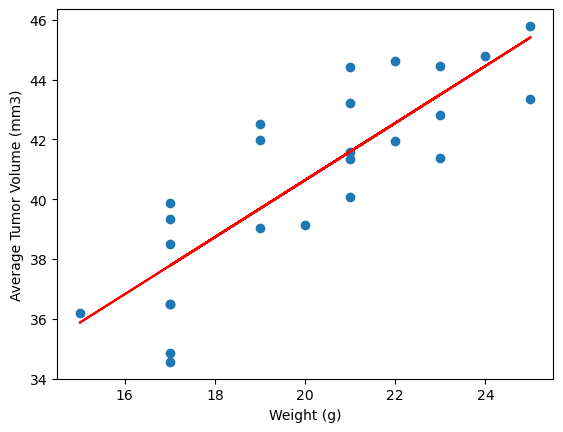

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
